In [2]:
# hide pakcage non critical warnings

import warnings

warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from easydict import EasyDict as edict
import matplotlib.pyplot as plt

In [4]:
import devkit.api as dk

In [5]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
import scipy.io as sio

In [6]:
os.path.abspath(os.path.join(os.path.dirname('__file__'), "..", ".."))

'/home/egxxlch/dev/proof-of-concept'

In [7]:
sys.path.append(
    os.path.abspath(
        os.path.join(os.path.dirname('__file__'), "..", "..")
    ))

In [8]:
%%bash
kinit -kt ~/$USER.keytab $USER
klist

Ticket cache: FILE:/tmp/krb5cc_2014
Default principal: egxxlch@IMACHINE.CBC.ERICSSON.AI

Valid starting     Expires            Service principal
08/27/20 01:55:01  08/28/20 01:55:00  krbtgt/IMACHINE.CBC.ERICSSON.AI@IMACHINE.CBC.ERICSSON.AI
	renew until 09/03/20 01:55:00


In [10]:
df_cic = pd.read_parquet('../../data/raw/cic/df_norm_final.parquet.gzip').reset_index()

In [11]:
df_cic.head()

eci    sector_ref_id  enb_number  enb_type     cell_name  sector_id  \
0  33571397  203120122228006          66  BS-3201形  ＣＶ袖ヶ浦南袖ＲＫ第四６          6   
1  33571397  203120122228006          66  BS-3201形  ＣＶ袖ヶ浦南袖ＲＫ第四６          6   
2  33571397  203120122228006          66  BS-3201形  ＣＶ袖ヶ浦南袖ＲＫ第四６          6   
3  33571397  203120122228006          66  BS-3201形  ＣＶ袖ヶ浦南袖ＲＫ第四６          6   
4  33571397  203120122228006          66  BS-3201形  ＣＶ袖ヶ浦南袖ＲＫ第四６          6   

  prefecture_name                  sector enb_vendor     date8  ...  \
0             千葉県  ＣＶ中島ＨＲＤ第一-ＣＶ袖ヶ浦南袖ＲＫ第四６        NEC  20200501  ...   
1             千葉県  ＣＶ中島ＨＲＤ第一-ＣＶ袖ヶ浦南袖ＲＫ第四６        NEC  20200501  ...   
2             千葉県  ＣＶ中島ＨＲＤ第一-ＣＶ袖ヶ浦南袖ＲＫ第四６        NEC  20200501  ...   
3             千葉県  ＣＶ中島ＨＲＤ第一-ＣＶ袖ヶ浦南袖ＲＫ第四６        NEC  20200501  ...   
4             千葉県  ＣＶ中島ＨＲＤ第一-ＣＶ袖ヶ浦南袖ＲＫ第四６        NEC  20200501  ...   

  avg_user_thp_ul lcp_dl_thp_nonca   avg_cqi  avg_bler_dl  avg_ul_pathloss  \
0        0.766637         0.670257  0.628667         0.32         0.681833   
1        0.608089         0.925600  0.686667         0.30         0.561000   
2        0.916000         0.905743  0.446000         0.72         0.533333   
3        0.854143         0.927143  0.458000         0.38         0.612667   
4        0.757531         0.743829  0.631333         0.30         0.546667   

  avg_prach_interference avg_pucch_interference avg_pusch_interference  \
0                 0.5325                 0.1140                 0.1145   
1                 0.5165                 0.1060                 0.1065   
2                 0.5140                 0.1055                 0.1040   
3                 0.5145                 0.1050                 0.1025   
4                 0.5160                 0.1070                 0.1045   

   ho_completed_sr  resource_limit_count  
0            0.000              0.011838  
1            1.000              0.001089  
2            1.000              0.000136  
3            1.000              0.000272  
4            0.895              0.000544  

[5 rows x 50 columns]

# load data & make graph

## load data

In [12]:
df_cic.columns

Index(['eci', 'sector_ref_id', 'enb_number', 'enb_type', 'cell_name',
       'sector_id', 'prefecture_name', 'sector', 'enb_vendor', 'date8',
       'enb_name', 'branch_name', 'carrier', 'carrier_id', 'bandwidth', 'hour',
       'class1', 'cell_key', 'max_rrc_conn_users', 'avg_rrc_conn_users',
       'avg_prb_util_dl', 'avg_prb_util_ul', 'cac_data_in_buffer',
       'cac_data_buffer_time_exceed_tresh', 'avg_pdcch_cce_load',
       'rrc_init_att', 'rrc_init_sr', 'reconn_att', 'reconn_sr',
       'voice_reconn_att', 'voice_reconn_sr', 'mo_signaling_att',
       'mo_signaling_sr', 'mo_data_uncompleted_call',
       'mt_access_uncompleted_call', 'mo_data_received', 'mo_data_sr',
       'mt_access_att', 'mt_access_sr', 'avg_user_thp_dl', 'avg_user_thp_ul',
       'lcp_dl_thp_nonca', 'avg_cqi', 'avg_bler_dl', 'avg_ul_pathloss',
       'avg_prach_interference', 'avg_pucch_interference',
       'avg_pusch_interference', 'ho_completed_sr', 'resource_limit_count'],
      dtype='object')

In [14]:
# df_cic['date_time'] = pd.to_datetime(df_cic['date_time'])
# df_cic['date'] = df_cic['date_time'].dt.date

df_cic['hour'] = df_cic['hour'].apply(lambda x: int(x[-2:]))

In [15]:
df_cic = df_cic.sort_values(['cell_key', 'date8', 'hour'])

In [16]:
df_cic.head()

eci    sector_ref_id  enb_number  enb_type  cell_name  sector_id  \
6264  121076997  201350350303001       14205  BS-3001形  徳地長者ケ原＋ｓ１          6   
6265  121076997  201350350303001       14205  BS-3001形  徳地長者ケ原＋ｓ１          6   
6266  121076997  201350350303001       14205  BS-3001形  徳地長者ケ原＋ｓ１          6   
6267  121076997  201350350303001       14205  BS-3001形  徳地長者ケ原＋ｓ１          6   
6268  121076997  201350350303001       14205  BS-3001形  徳地長者ケ原＋ｓ１          6   

     prefecture_name              sector enb_vendor     date8  ...  \
6264             山口県  徳地八坂坂本Ａａ-徳地長者ケ原＋ｓ１    Fujitsu  20200501  ...   
6265             山口県  徳地八坂坂本Ａａ-徳地長者ケ原＋ｓ１    Fujitsu  20200501  ...   
6266             山口県  徳地八坂坂本Ａａ-徳地長者ケ原＋ｓ１    Fujitsu  20200501  ...   
6267             山口県  徳地八坂坂本Ａａ-徳地長者ケ原＋ｓ１    Fujitsu  20200501  ...   
6268             山口県  徳地八坂坂本Ａａ-徳地長者ケ原＋ｓ１    Fujitsu  20200501  ...   

     avg_user_thp_ul lcp_dl_thp_nonca   avg_cqi  avg_bler_dl  avg_ul_pathloss  \
6264        0.790000         0.910883  0.800000         0.00         0.700000   
6265        0.817335         0.845650  0.800000         0.00         0.700000   
6266        0.823910         0.824967  0.566667         0.56         0.833333   
6267        0.945540         0.937383  0.533333         1.00         0.766667   
6268        0.864850         0.836217  0.683333         0.30         0.800000   

      avg_prach_interference avg_pucch_interference avg_pusch_interference  \
6264                  0.4560                 0.0505                  0.045   
6265                  0.4555                 0.0505                  0.045   
6266                  0.4560                 0.0510                  0.045   
6267                  0.4560                 0.0505                  0.045   
6268                  0.4555                 0.0505                  0.045   

      ho_completed_sr  resource_limit_count  
6264              0.0              0.007929  
6265              0.0              0.007405  
6266              0.0              0.019222  
6267              0.0              0.007667  
6268              0.0              0.012741  

[5 rows x 50 columns]

In [17]:
lst_std_kpis = ['max_rrc_conn_users', 'avg_rrc_conn_users', 'avg_prb_util_dl',
       'avg_prb_util_ul', 'cac_data_in_buffer',
       'cac_data_buffer_time_exceed_tresh', 'avg_pdcch_cce_load',
       'rrc_init_att', 'rrc_init_sr', 'reconn_att', 'reconn_sr',
       'voice_reconn_att', 'voice_reconn_sr', 'mo_signaling_att',
       'mo_signaling_sr', 'mo_data_uncompleted_call',
       'mt_access_uncompleted_call', 'mo_data_received', 'mo_data_sr',
       'mt_access_att', 'mt_access_sr', 'avg_user_thp_dl', 'avg_user_thp_ul',
       'lcp_dl_thp_nonca', 'avg_cqi', 'avg_bler_dl', 'avg_ul_pathloss',
       'avg_prach_interference', 'avg_pucch_interference',
       'avg_pusch_interference', 'ho_completed_sr', 'resource_limit_count']

In [18]:
df_cic.columns

Index(['eci', 'sector_ref_id', 'enb_number', 'enb_type', 'cell_name',
       'sector_id', 'prefecture_name', 'sector', 'enb_vendor', 'date8',
       'enb_name', 'branch_name', 'carrier', 'carrier_id', 'bandwidth', 'hour',
       'class1', 'cell_key', 'max_rrc_conn_users', 'avg_rrc_conn_users',
       'avg_prb_util_dl', 'avg_prb_util_ul', 'cac_data_in_buffer',
       'cac_data_buffer_time_exceed_tresh', 'avg_pdcch_cce_load',
       'rrc_init_att', 'rrc_init_sr', 'reconn_att', 'reconn_sr',
       'voice_reconn_att', 'voice_reconn_sr', 'mo_signaling_att',
       'mo_signaling_sr', 'mo_data_uncompleted_call',
       'mt_access_uncompleted_call', 'mo_data_received', 'mo_data_sr',
       'mt_access_att', 'mt_access_sr', 'avg_user_thp_dl', 'avg_user_thp_ul',
       'lcp_dl_thp_nonca', 'avg_cqi', 'avg_bler_dl', 'avg_ul_pathloss',
       'avg_prach_interference', 'avg_pucch_interference',
       'avg_pusch_interference', 'ho_completed_sr', 'resource_limit_count'],
      dtype='object')

In [19]:
df_cic.groupby(['date8', 'cell_key']).size().unique()

array([24])

In [20]:
df_cic.drop_duplicates(['cell_key', 'date8'])['class1'].value_counts()

access_cell_edge      930
ho_SR                 923
no_issue              913
normal                899
high_load             880
uplink_interf         876
prach_interference    868
signaling_SR          859
resource_limit        859
signaling_load        852
access_resource       747
very_high_load         92
Name: class1, dtype: int64

In [21]:
df_cic_wide = df_cic.groupby(['date8', 'cell_key', 'hour'])[lst_std_kpis].sum().unstack()

In [22]:
df_cic_wide.shape

(9698, 768)

In [23]:
new_cols = [" ".join(map(str, df_cic_wide.columns.tolist()[i])).replace(" ", "_") for i in range(df_cic_wide.shape[1])]
df_cic_wide.columns = new_cols
df_cic_wide = df_cic_wide.reset_index().set_index(['date8', 'cell_key'])

In [24]:
df_cic_wide.head()

max_rrc_conn_users_0  \
date8    cell_key                                                                   
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...              0.009472   
         中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...              0.407313   
         中国_22322_◆皆実中ＨＡＡ_NEC_BS-3201形_2_3_123154977_203...              0.272721   
         中国_23506_◆引野北ＨＡＢ_NEC_BS-3201形_3_3_123458082_203...              0.308139   
         中国_39613_新南陽西ＨＡＣ_NEC_BS-3201形_5_1_127581444_201...              0.056834   

                                                             max_rrc_conn_users_1  \
date8    cell_key                                                                   
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...              0.009472   
         中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...              0.402576   
         中国_22322_◆皆実中ＨＡＡ_NEC_BS-3201形_2_3_123154977_203...              0.276263   
         中国_23506_◆引野北ＨＡＢ_NEC_BS-3201形_3_3_123458082_203...              0.237303   
         中国_39613_新南陽西ＨＡＣ_NEC_BS-3201形_5_1_127581444_201...              0.052098   

                                                             max_rrc_conn_users_2  \
date8    cell_key                                                                   
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...              0.014209   
         中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...              0.397840   
         中国_22322_◆皆実中ＨＡＡ_NEC_BS-3201形_2_3_123154977_203...              0.279804   
         中国_23506_◆引野北ＨＡＢ_NEC_BS-3201形_3_3_123458082_203...              0.230219   
         中国_39613_新南陽西ＨＡＣ_NEC_BS-3201形_5_1_127581444_201...              0.052098   

                                                             max_rrc_conn_users_3  \
date8    cell_key                                                                   
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...              0.009472   
         中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...              0.402576   
         中国_22322_◆皆実中ＨＡＡ_NEC_BS-3201形_2_3_123154977_203...              0.247928   
         中国_23506_◆引野北ＨＡＢ_NEC_BS-3201形_3_3_123458082_203...              0.205426   
         中国_39613_新南陽西ＨＡＣ_NEC_BS-3201形_5_1_127581444_201...              0.056834   

                                                             max_rrc_conn_users_4  \
date8    cell_key                                                                   
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...              0.009472   
         中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...              0.388368   
         中国_22322_◆皆実中ＨＡＡ_NEC_BS-3201形_2_3_123154977_203...              0.237303   
         中国_23506_◆引野北ＨＡＢ_NEC_BS-3201形_3_3_123458082_203...              0.208968   
         中国_39613_新南陽西ＨＡＣ_NEC_BS-3201形_5_1_127581444_201...              0.047362   

                                                             max_rrc_conn_users_5  \
date8    cell_key                                                                   
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...              0.009472   
         中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...              0.468883   
         中国_22322_◆皆実中ＨＡＡ_NEC_BS-3201形_2_3_123154977_203...              0.272721   
         中国_23506_◆引野北ＨＡＢ_NEC_BS-3201形_3_3_123458082_203...              0.233761   
         中国_39613_新南陽西ＨＡＣ_NEC_BS-3201形_5_1_127581444_201...              0.052098   

                                                             max_rrc_conn_users_6  \
date8    cell_key                                                                   
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...              0.004736   
         中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...              0.421521   
         中国_22322_◆皆実中ＨＡＡ_NEC_BS-3201形_2_3_123154977_203...              0.297514   
         中国_23506_◆引野北ＨＡＢ_NEC_BS-3201形_3_3_123458082_203... 

In [25]:
df_y = df_cic[['date8', 'cell_key', 'eci', 'class1']].drop_duplicates().set_index(['date8', 'cell_key'])

In [26]:
df_y.head()

eci  \
date8    cell_key                                                        
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...  121076997   
20200505 中国_14296_萩北畑尻Ａａ_Fujitsu_BS-3001形_2_1_121100289_...  121100289   
20200501 中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...  121809669   
20200502 中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...  121809669   
20200503 中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...  121809669   

                                                                         class1  
date8    cell_key                                                                
20200501 中国_14205_徳地八坂坂本Ａａ_Fujitsu_BS-3001形_6_1_12107699...    access_cell_edge  
20200505 中国_14296_萩北畑尻Ａａ_Fujitsu_BS-3001形_2_1_121100289_...    access_cell_edge  
20200501 中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...  prach_interference  
20200502 中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...  prach_interference  
20200503 中国_17067_◆西伯中山Ｂａ_NEC_BS-3001形_6_1_121809669_201...  prach_interference

In [27]:
df_cic_wide = df_cic_wide.merge(df_y, how='left', left_index=True, right_index=True)

In [28]:
assert len(df_cic_wide) == len(df_cic) / 24

In [29]:
df_cic_wide = df_cic_wide.sort_index()

In [30]:
arr_cell_id = df_cic_wide['eci'].values
arr_class1 = df_cic_wide['class1'].values

In [31]:
feat_norm_wide = df_cic_wide.drop(columns=['eci', 'class1']).values

In [32]:
feat_norm_wide.shape

(9698, 768)

In [33]:
feat_norm = df_cic_wide.drop(columns=['eci', 'class1']).values.reshape(-1, len(lst_std_kpis), 24)  # from wide table to  3d array
# feat_norm = df_cic[lst_std_kpis].values.reshape(-1, 24, len(lst_std_kpis))  # from long table to  3d array

In [34]:
feat_norm.shape

(9698, 32, 24)

## viz raw data

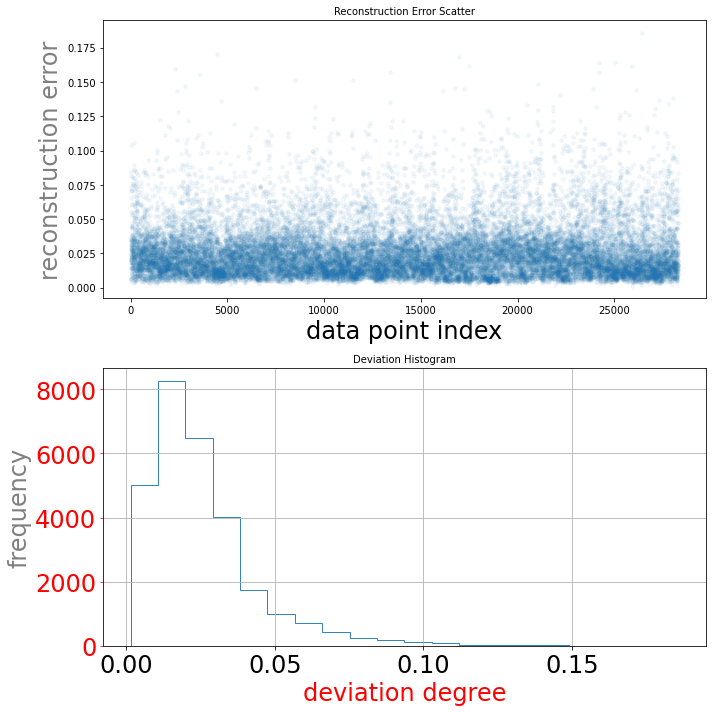

In [146]:
dk.mgcVizMseDistribution(arr_mse, inlier_ts=None, outlier_ts=None, figsize=(10, 10))

total samples: 15 / 930
unique samples: 15 / 480


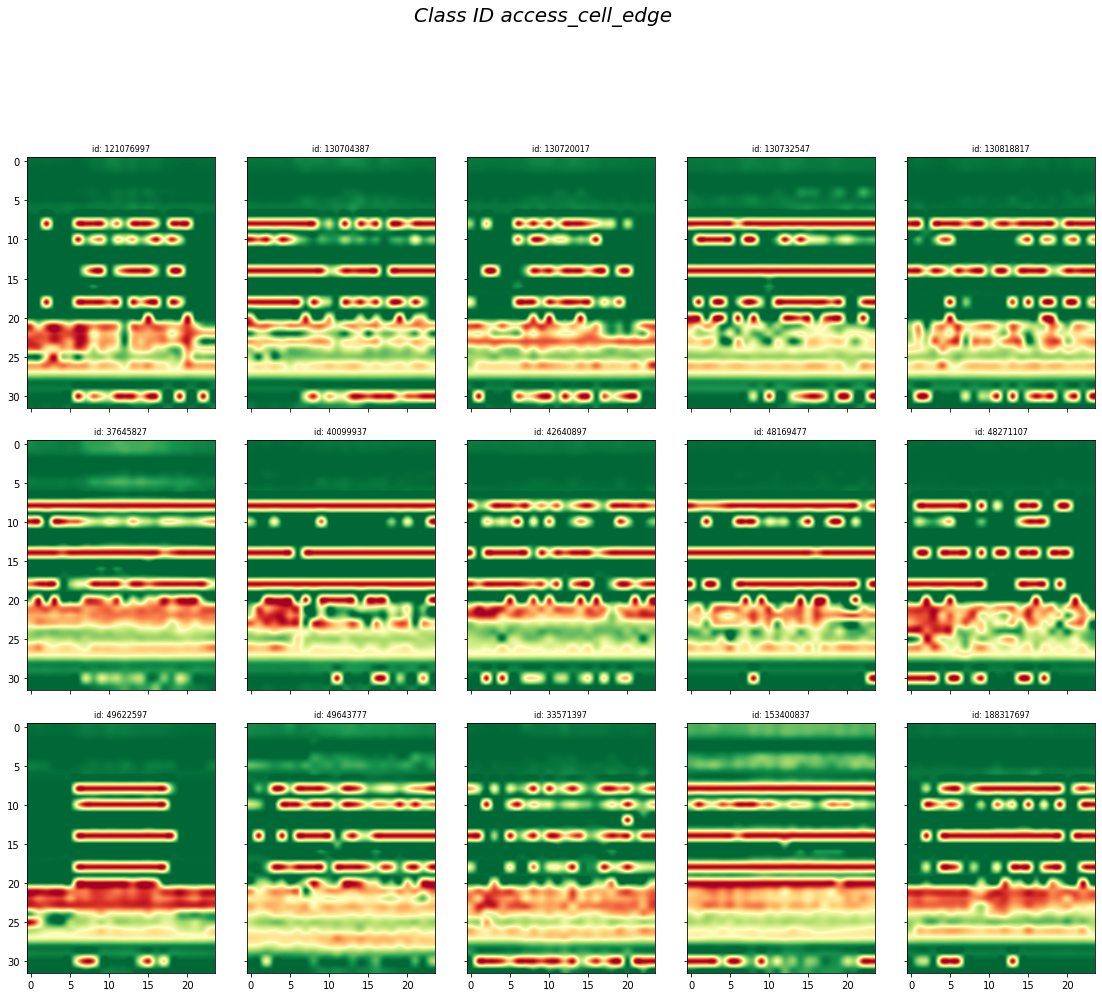

total samples: 15 / 747
unique samples: 15 / 244


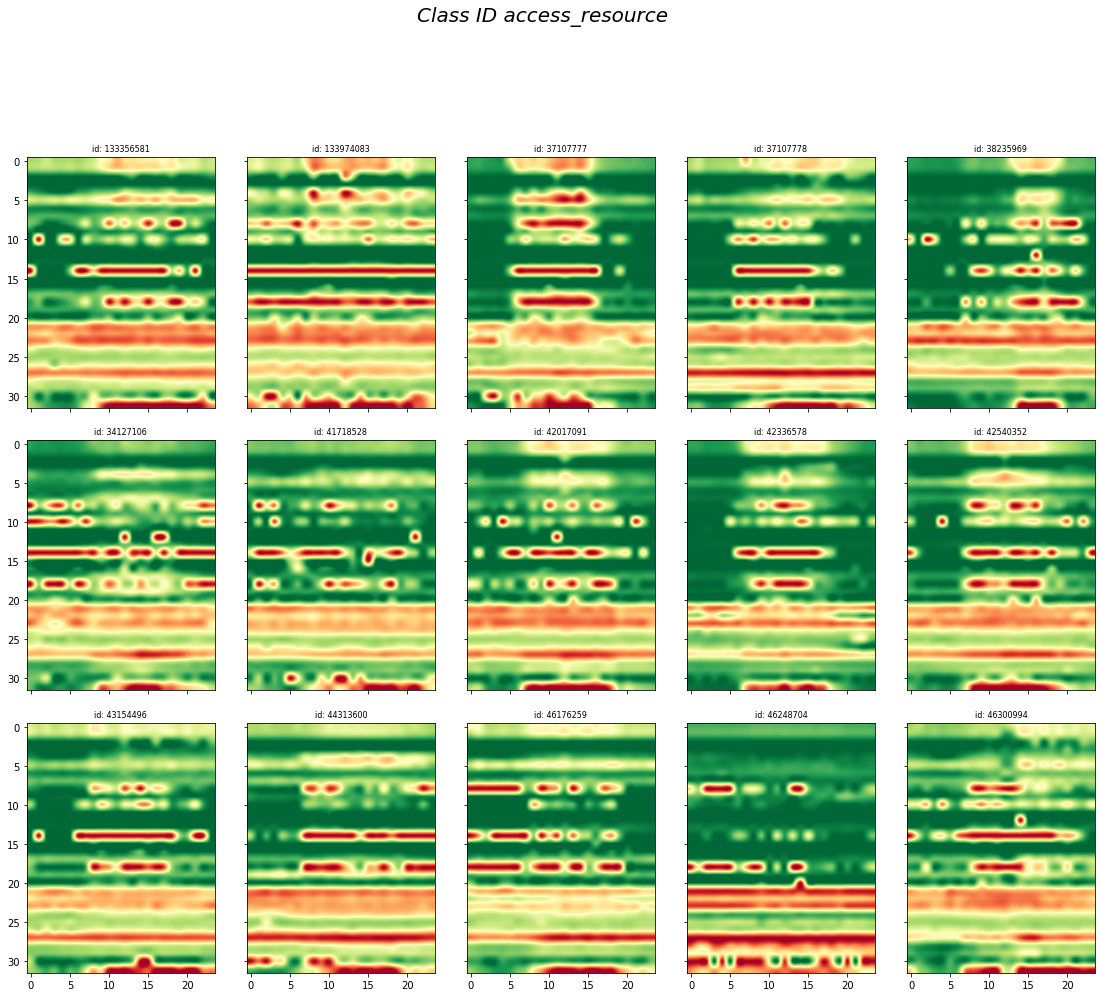

total samples: 15 / 880
unique samples: 15 / 122


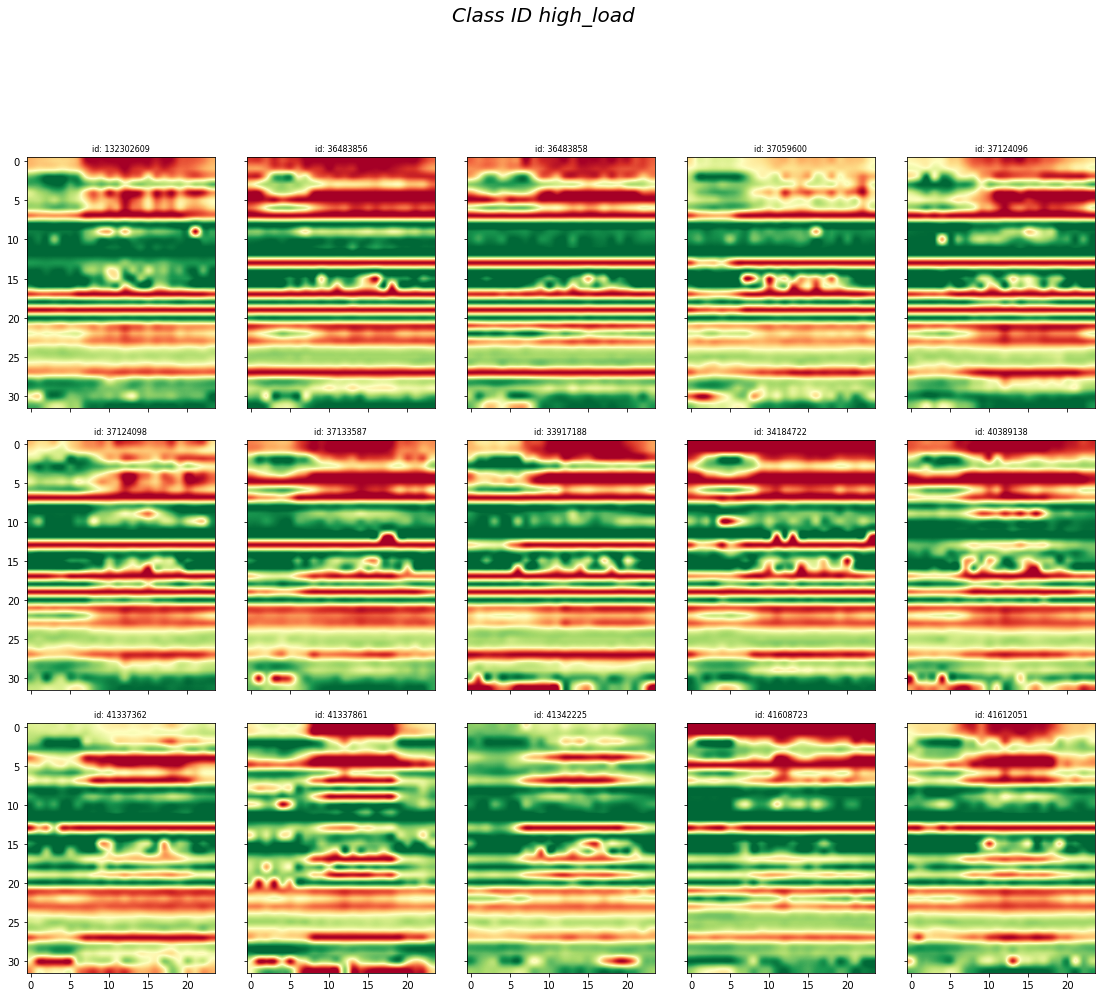

total samples: 15 / 923
unique samples: 15 / 469


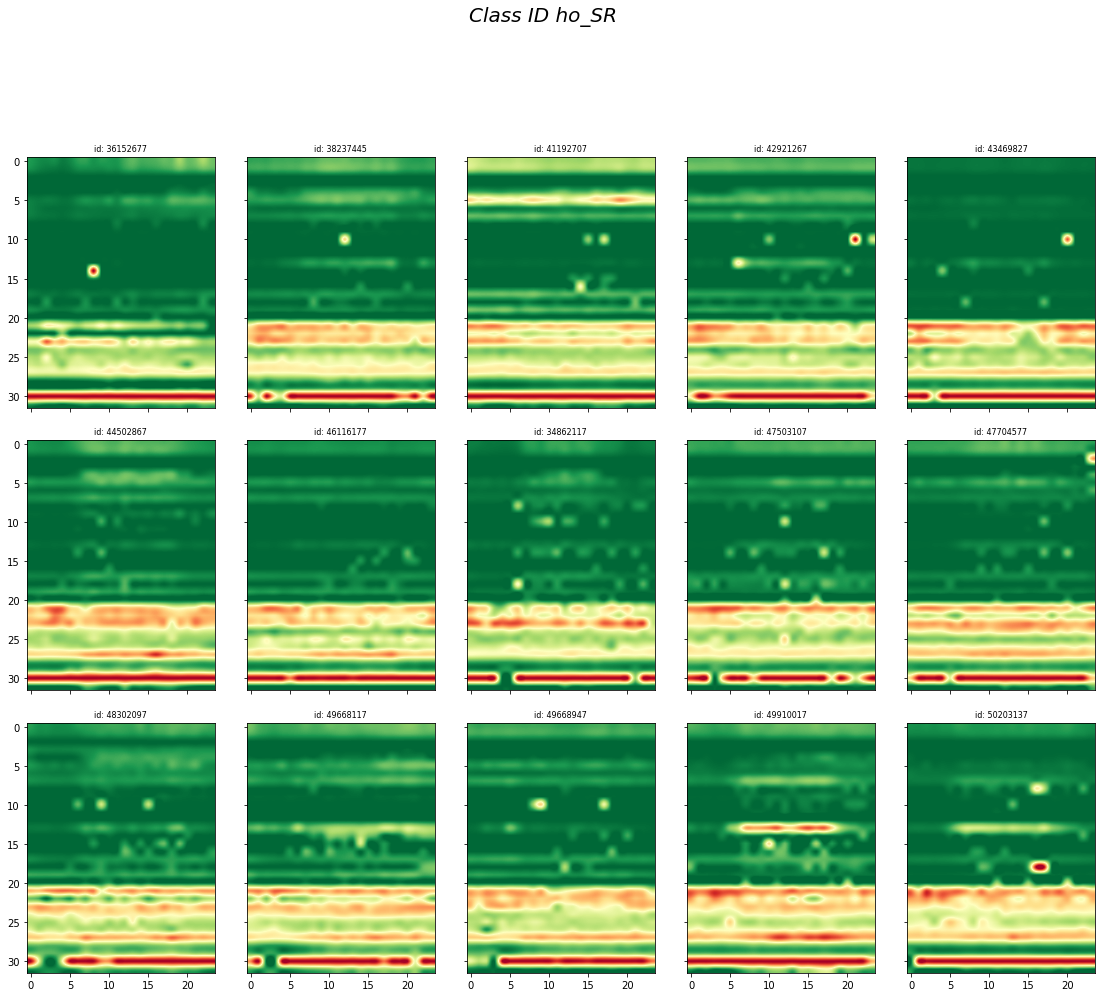

total samples: 15 / 913
unique samples: 15 / 505


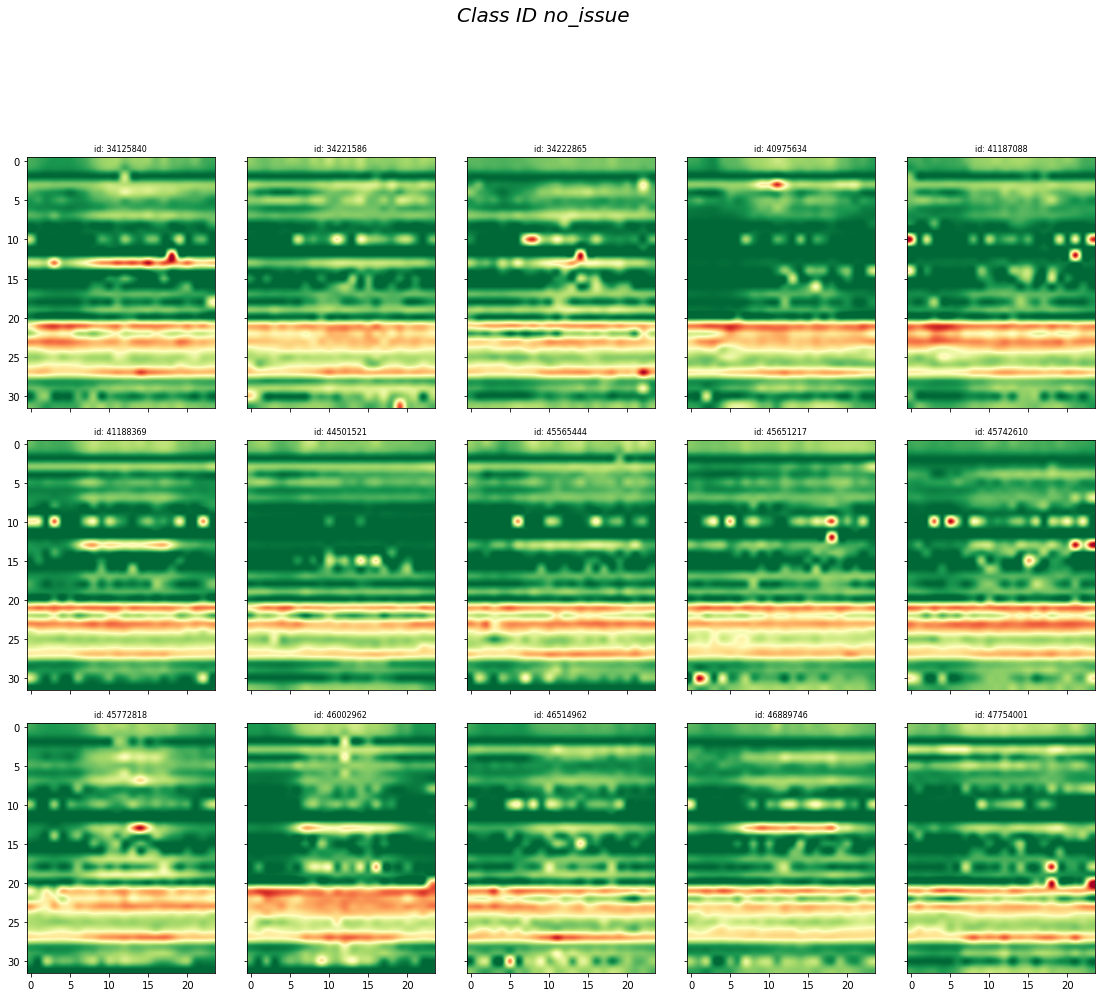

total samples: 15 / 899
unique samples: 15 / 280


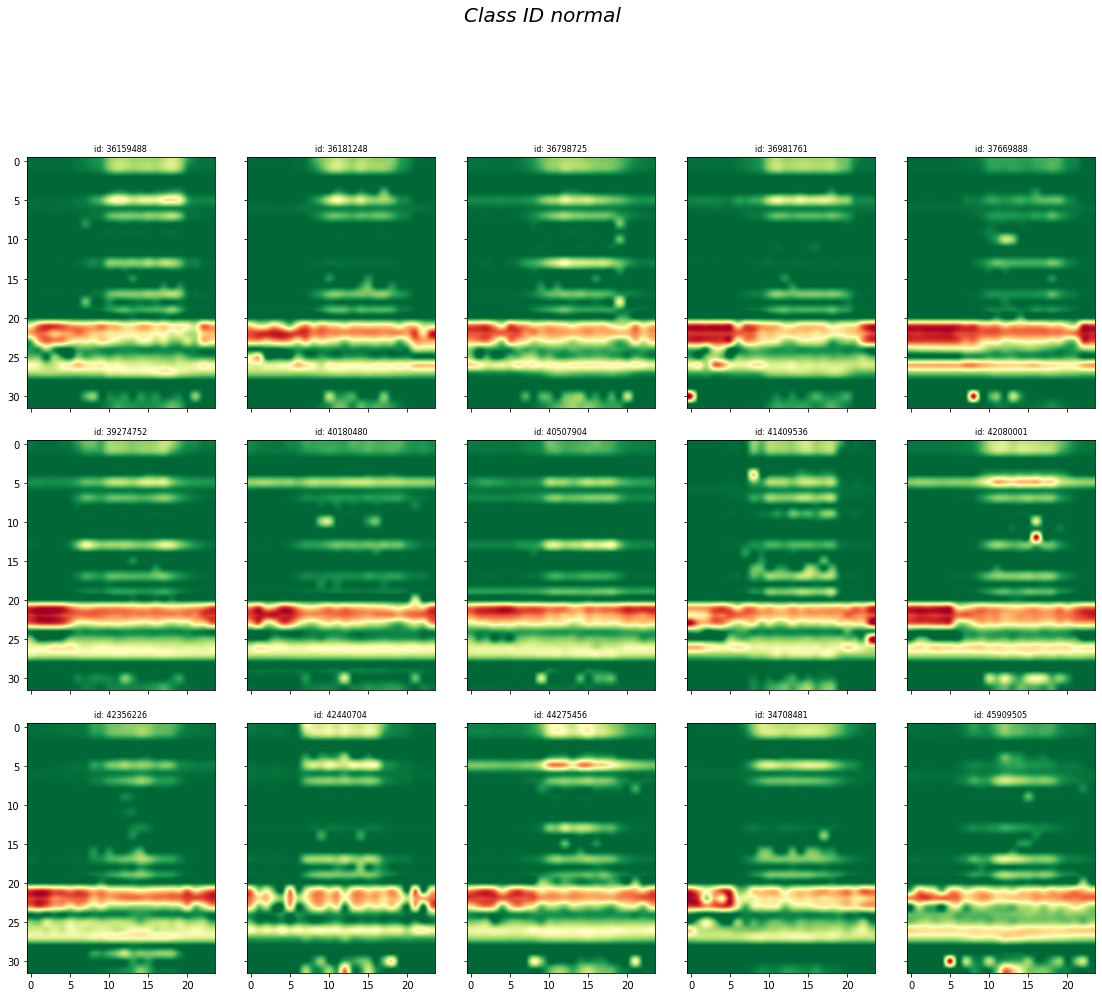

total samples: 15 / 868
unique samples: 15 / 140


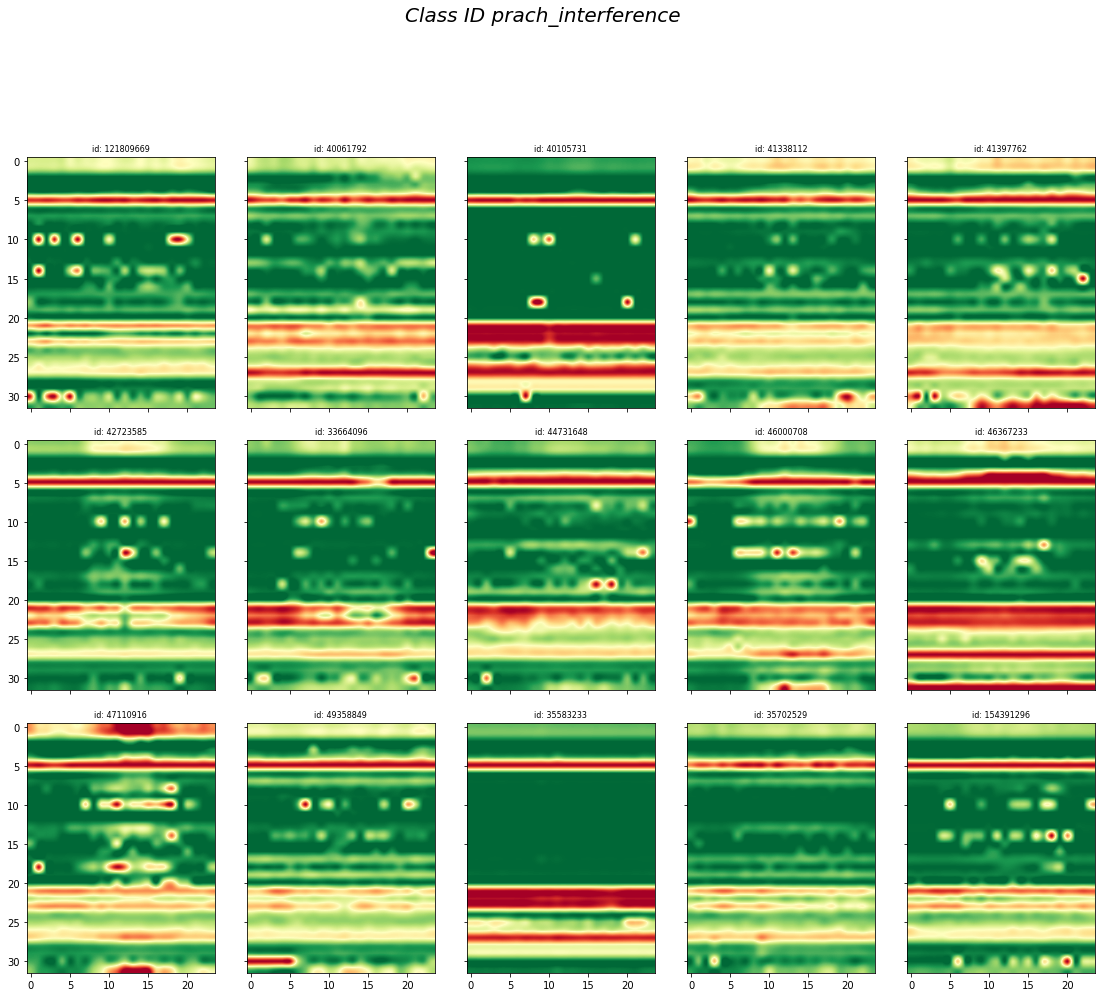

total samples: 15 / 859
unique samples: 15 / 141


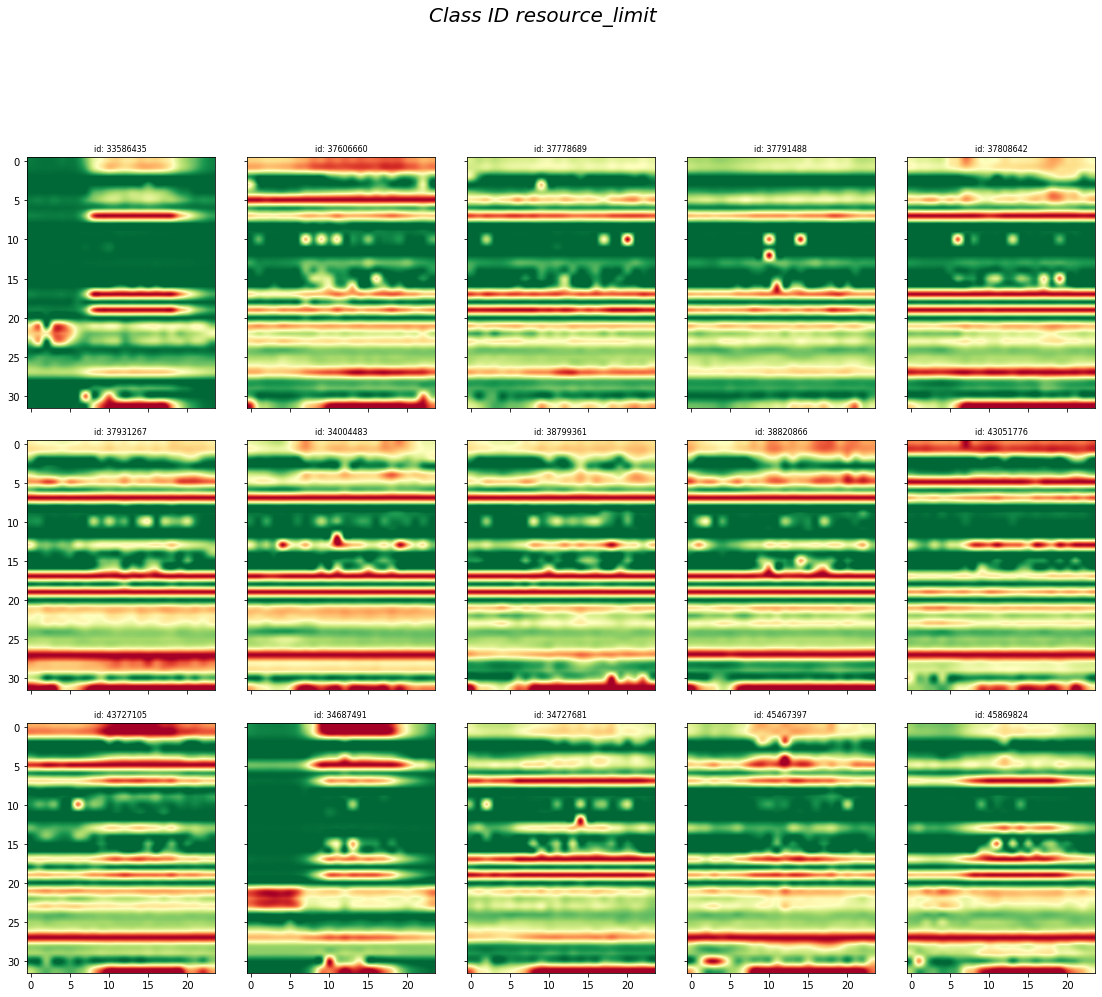

total samples: 15 / 859
unique samples: 15 / 178


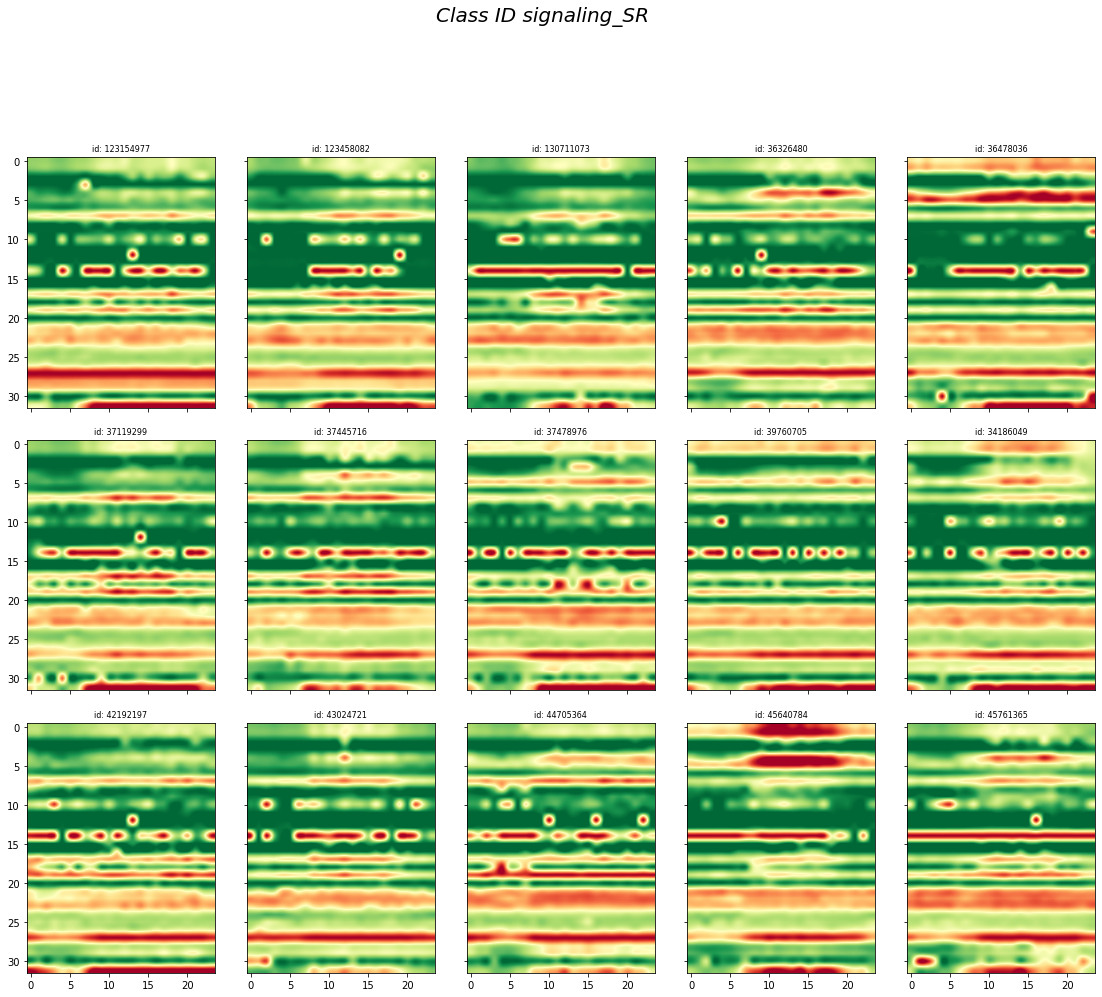

total samples: 15 / 852
unique samples: 15 / 210


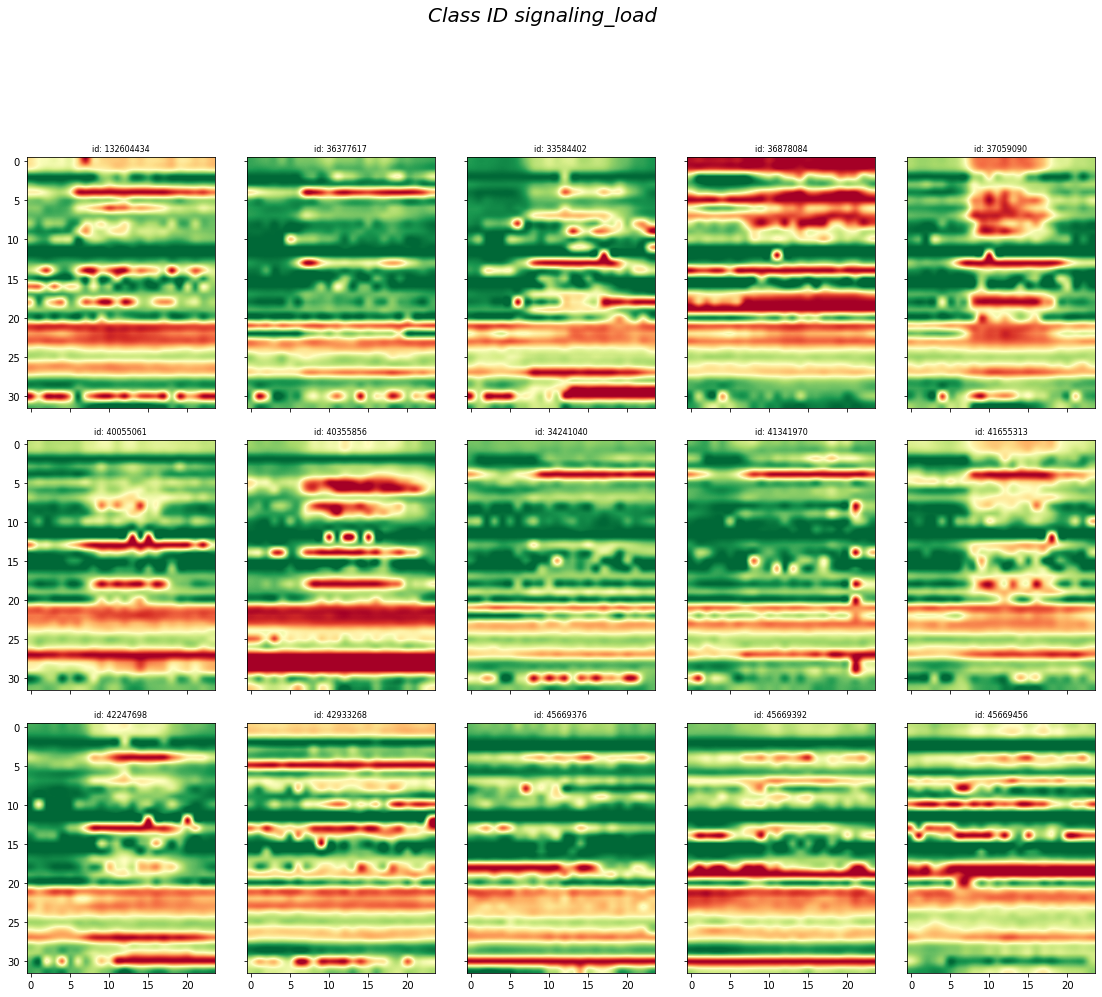

total samples: 15 / 876
unique samples: 15 / 202


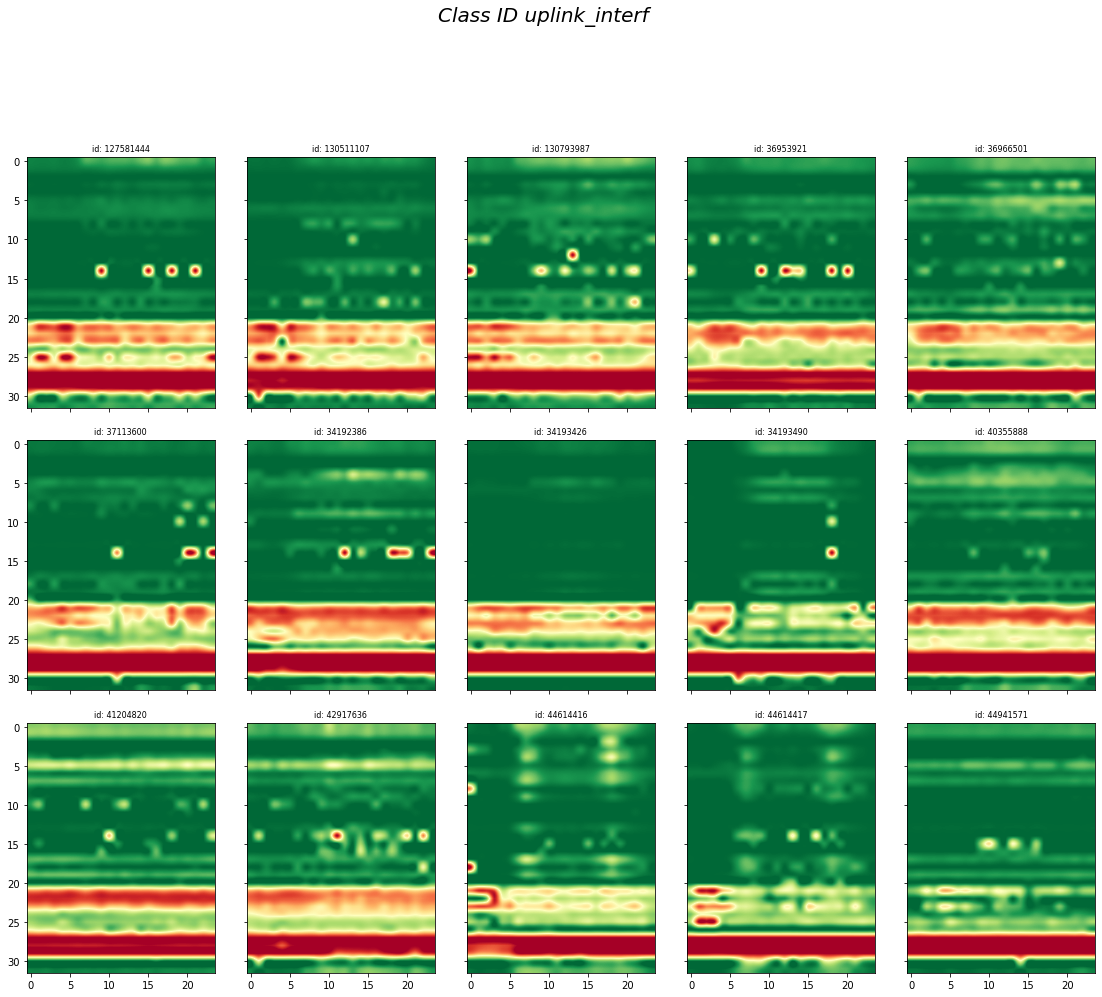

total samples: 15 / 92
unique samples: 11 / 37


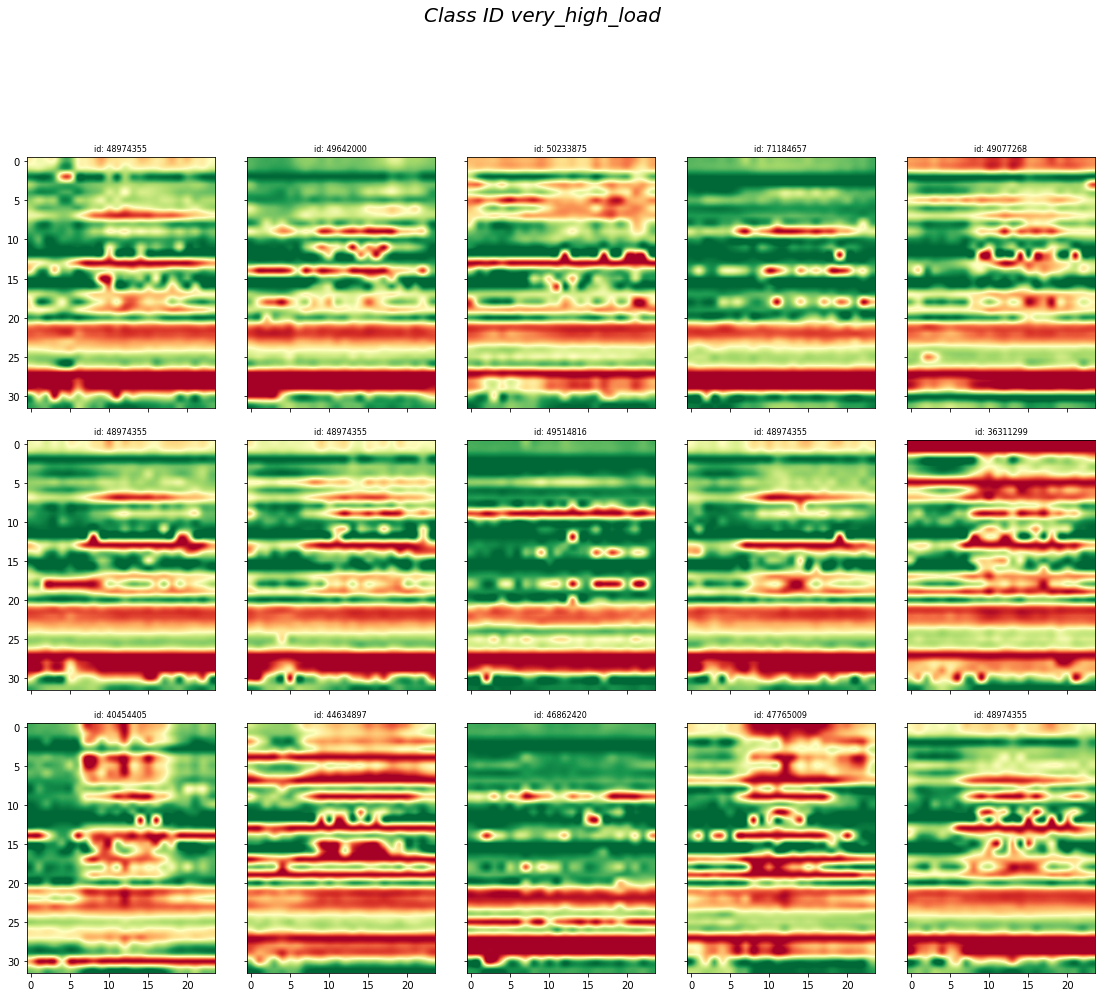

In [70]:
for y_ in np.unique(arr_class1):
    class_indx = np.where(arr_class1 == y_)[0]
    feat_norm_sub = feat_norm[class_indx]
    arr_cell_id_sub = arr_cell_id[class_indx]
    def_kwargs = {
        'X': feat_norm_sub,
        'arr_ids': arr_cell_id_sub, # the ID of each image belonging to
        'arr_labels':None,  # the label of each image belonging to
        'category': y_,
        'set_random': False,
        'figsize': (20, 15),
        'title_size': 8,
        'nrows': 3,
        'ncols': 5,
    }

    dk.mgcMultiHeat(**def_kwargs)

## make traindata

In [38]:
print(feat_norm_wide.shape, arr_cell_id.shape, arr_class1.shape)

(9698, 768) (9698,) (9698,)


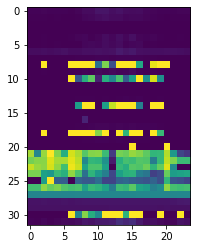

In [37]:
plt.imshow(feat_norm[0])

In [39]:
sio.savemat("../../data/raw/cic/traindata.mat",
            {'X': feat_norm_wide, 'gtlabels': arr_class1, 'id': arr_cell_id})

In [40]:
!ls ../../data/raw/cic/

df_norm_final.parquet.gzip  traindata.mat


## make graph

In [41]:
def mkNN(X, k, measure='euclidean'):
    """
    Construct mutual_kNN for large scale dataset

    If j is one of i's closest neighbors and i is also one of j's closest members,
    the edge will appear once with (i,j) where i < j.

    Parameters
    ----------
    X : [n_samples, n_dim] array
    k : int
      number of neighbors for each sample in X
    Returns
    -------
    weights 
    2d array: [the lengeth of X, 3] 
    Like: 
    [0, 10, 2.04]  # the distance is 2.04 from data point 0 to 10
    [0, 16,  2.36] # the distance is 2.36 from data point 0 to 16
    ...
    """
    from scipy.spatial import distance
    from scipy.sparse import csr_matrix, triu, find
    from scipy.sparse.csgraph import minimum_spanning_tree

    samples = X.shape[0]
    batchsize = 10000
    b = np.arange(k + 1)
    b = tuple(b[1:].ravel())

    z = np.zeros((samples, k))
    weigh = np.zeros_like(z)

    # This loop speeds up the computation by operating in batches
    # This can be parallelized to further utilize CPU/GPU resource
    for x in np.arange(0, samples, batchsize):
        start = x
        end = min(x + batchsize, samples)

        w = distance.cdist(X[start:end], X, measure)

        y = np.argpartition(w, b, axis=1)

        z[start:end, :] = y[:, 1:k + 1]
        weigh[start:end, :] = np.reshape(w[tuple(np.repeat(np.arange(end - start), k)), tuple(y[:, 1:k + 1].ravel())],
                                         (end - start, k))
        del (w)

    ind = np.repeat(np.arange(samples), k)

    P = csr_matrix((np.ones((samples * k)), (ind.ravel(), z.ravel())), shape=(samples, samples))
    Q = csr_matrix((weigh.ravel(), (ind.ravel(), z.ravel())), shape=(samples, samples))

    Tcsr = minimum_spanning_tree(Q)
    P = P.minimum(P.transpose()) + Tcsr.maximum(Tcsr.transpose())
    P = triu(P, k=1)

    return np.asarray(find(P)).T


In [42]:
dict_params_make_graph = {
    'k': 100,
    'preprocess': None,
    'algo': 'mknn',
    'measure': 'euclidean',
    'isPCA': None,
}


In [43]:
feat_norm_wide.shape

(9698, 768)

In [44]:
X_graph = mkNN(feat_norm_wide, k=dict_params_make_graph['k'], measure=dict_params_make_graph['measure'])

In [45]:
X_graph.shape

(241675, 3)

In [46]:
X_graph

array([[2.000e+00, 3.000e+00, 1.000e+00],
       [4.000e+00, 5.000e+00, 1.000e+00],
       [0.000e+00, 8.000e+00, 1.000e+00],
       ...,
       [9.629e+03, 9.697e+03, 1.000e+00],
       [9.639e+03, 9.697e+03, 1.000e+00],
       [9.650e+03, 9.697e+03, 1.000e+00]])

In [96]:
np.max(X_graph, axis=0)

array([9.68600000e+03, 9.69700000e+03, 8.04780001e+00])

In [47]:
sio.savemat("../../data/raw/cic/pretrained.mat", mdict={'X': feat_norm_wide, 'w': X_graph[:, :3], 'gtlabels': arr_class1, 'id': arr_cell_id})

# pretraining SDAE

In [64]:
import torch
import torch.nn as nn

import torch.nn.functional as F
import torch.nn.init as init


In [77]:
from src.models.dcc.pretraining import train, test

In [78]:
from src.models.dcc.SDAE import SDAE

In [ ]:
o

In [83]:
import src.models.dcc.config as cfg

In [84]:
cfg.__C.ROOT_DIR

'/Users/jasper/dev/mmc'

In [92]:
cfg.get_data_dir('smmc')

'/Users/jasper/dev/mmc/data/raw/v1/dcc/smmc'

In [88]:
cfg.get_output_dir('smmc')

'/Users/jasper/dev/mmc/data/raw/v1/dcc/smmc/results'

In [114]:
data = sio.loadmat(os.path.join(cfg.get_data_dir('smmc'), 'outlier_data.mat'), mat_dtype=True)

In [116]:
data['X'].shape

[autoreload of src.models.dcc.pretraining failed: Traceback (most recent call last):
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/jasper/opt/miniconda3/envs/mmc/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/jasper/dev/mmc/src/models/dcc/pretraining.py", line 6, in <module>
    from config import

(7173, 960)

In [118]:
960/24

40.0

In [115]:
data

{'X': array([[0.49669343, 0.14019979, 0.17625823, ..., 0.45432545, 0.78161616,
         0.73894681],
        [0.37539515, 0.13891856, 0.1938366 , ..., 0.27448274, 0.45855641,
         0.94797384],
        [1.        , 0.75793459, 0.        , ..., 0.12451608, 0.4578601 ,
         0.67407918],
        ...,
        [0.42153699, 0.12055382, 0.17907545, ..., 0.58004684, 0.24613929,
         0.08634149],
        [0.58372035, 0.11306038, 0.00856297, ..., 0.24914325, 0.49478616,
         0.83213314],
        [0.45414437, 0.18129893, 0.14306835, ..., 0.50939882, 0.68329714,
         0.67644943]]),
 '__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Fri Aug 21 16:29:46 2020',
 '__version__': '1.0',
 'id': array([[array(['000001.SZ_2013-01-29'], dtype='<U20'),
         array(['000001.SZ_2014-12-18'], dtype='<U20'),
         array(['000001.SZ_2015-05-14'], dtype='<U20'), ...,
         array(['603996.SH_2018-07-05'], dtype='<U20'),
         array(['603997.SH_2017-0

In [106]:
train_data = data['X'][:].astype(np.float32)

In [107]:
train_labels = np.squeeze(data['Y'][:])

In [108]:
train_labels

array([], shape=(0, 0), dtype=float64)

## data preparation

In [79]:
net_sdae = SDAE(dim=[784, 500, 500, 2000, 10], dropout=0.2, slope=0)